<a href="https://colab.research.google.com/github/aelukin/ML_ITMO/blob/main/Wind_turbine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортирование данных, подключение библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/MyDrive/ML\ ITMO

/content/gdrive/MyDrive/ML ITMO


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_blobs
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from matplotlib.gridspec import GridSpec

In [ ]:
path='wind_turbines.csv'
df=pd.read_csv(path)

1. EDA

In [ ]:
df

,Site.State,Site.County,Year,Turbine.Capacity,Turbine.Hub_Height,Turbine.Rotor_Diameter,Turbine.Swept_Area,Turbine.Total_Height,Project.Capacity,Project.Number_Turbines,Site.Latitude,Site.Longitude
0,IA,Story County,2017,3000,87.5,125.0,12271.85,150.0,30.000,10,-93.518082,42.013630
1,IA,Hardin County,2017,3000,87.5,125.0,12271.85,150.0,30.000,10,-93.367798,42.497940
2,IA,Story County,2017,3000,87.5,125.0,12271.85,150.0,30.000,10,-93.513710,42.019119
3,IA,Story County,2017,3000,87.5,125.0,12271.85,150.0,30.000,10,-93.523651,42.006813
4,IA,Story County,2017,3000,87.5,125.0,12271.85,150.0,30.000,10,-93.632835,41.882477
...,...,...,...,...,...,...,...,...,...,...,...,...
63956,TX,El Paso County,2015,1700,80.0,100.0,7853.98,130.1,3.400,2,-106.405434,31.788124
63957,TX,El Paso County,2015,1700,80.0,100.0,7853.98,130.1,3.400,2,-106.405670,31.788097
63958,NY,Erie County,2016,100,37.0,21.0,346.36,47.5,0.200,2,-78.931122,42.977005
63959,AK,Northwest Arctic Borough,2003,65,30.5,15.0,176.71,38.0,0.975,15,-162.551575,66.837898


Расшифровка данных таблицы:

'Site.State' -- штат

'Site.County' -- округ

'Year' -- год запуска

'Turbine.Capacity' -- мощность ВЭУ

'Turbine.Hub_Height' -- высота гондолы ВЭУ

'Turbine.Rotor_Diameter' -- диаметр ротора ВЭУ

'Turbine.Swept_Area' -- площадь ветроколеса ВЭУ

'Turbine.Total_Height' -- общая высота ВЭУ

'Project.Capacity' -- общая мощность ветропарка

'Project.Number_Turbines' -- кол-во ВЭУ в ветропарке

'Site.Latitude' -- широта ветропарка

'Site.Longitude' -- долгота ветропарка

In [ ]:
df.dtypes

Site.State                  object
Site.County                 object
Year                         int64
Turbine.Capacity             int64
Turbine.Hub_Height         float64
Turbine.Rotor_Diameter     float64
Turbine.Swept_Area         float64
Turbine.Total_Height       float64
Project.Capacity           float64
Project.Number_Turbines      int64
Site.Latitude              float64
Site.Longitude             float64
dtype: object

In [ ]:
df.isna().sum()

Site.State                 0
Site.County                0
Year                       0
Turbine.Capacity           0
Turbine.Hub_Height         0
Turbine.Rotor_Diameter     0
Turbine.Swept_Area         0
Turbine.Total_Height       0
Project.Capacity           0
Project.Number_Turbines    0
Site.Latitude              0
Site.Longitude             0
dtype: int64

In [ ]:
df.describe()

,Year,Turbine.Capacity,Turbine.Hub_Height,Turbine.Rotor_Diameter,Turbine.Swept_Area,Turbine.Total_Height,Project.Capacity,Project.Number_Turbines,Site.Latitude,Site.Longitude
count,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000
mean,2011.768593,1945.300714,80.265244,94.682148,7472.673751,127.634646,171.037738,96.923172,-99.688416,38.592440
std,6.444849,689.733922,12.466083,23.449221,3267.170143,22.946809,102.126002,69.180367,11.005005,5.487171
min,1983.000000,50.000000,22.800000,14.000000,153.940000,30.400000,0.050000,1.000000,-171.713074,13.389381
25%,2008.000000,1500.000000,80.000000,82.000000,5281.020000,121.000000,100.000000,56.000000,-102.597290,34.252995
50%,2012.000000,2000.000000,80.000000,97.000000,7389.810000,130.100000,160.000000,85.000000,-99.329704,39.316921
75%,2017.000000,2300.000000,85.000000,110.000000,9503.320000,144.500000,211.220000,120.000000,-94.947594,42.991066
max,2021.000000,6000.000000,131.000000,155.000000,18869.190000,199.600000,525.020000,460.000000,144.722656,66.839905


In [ ]:
df.duplicated().sum()

0

Построим тепловую карту корреляции

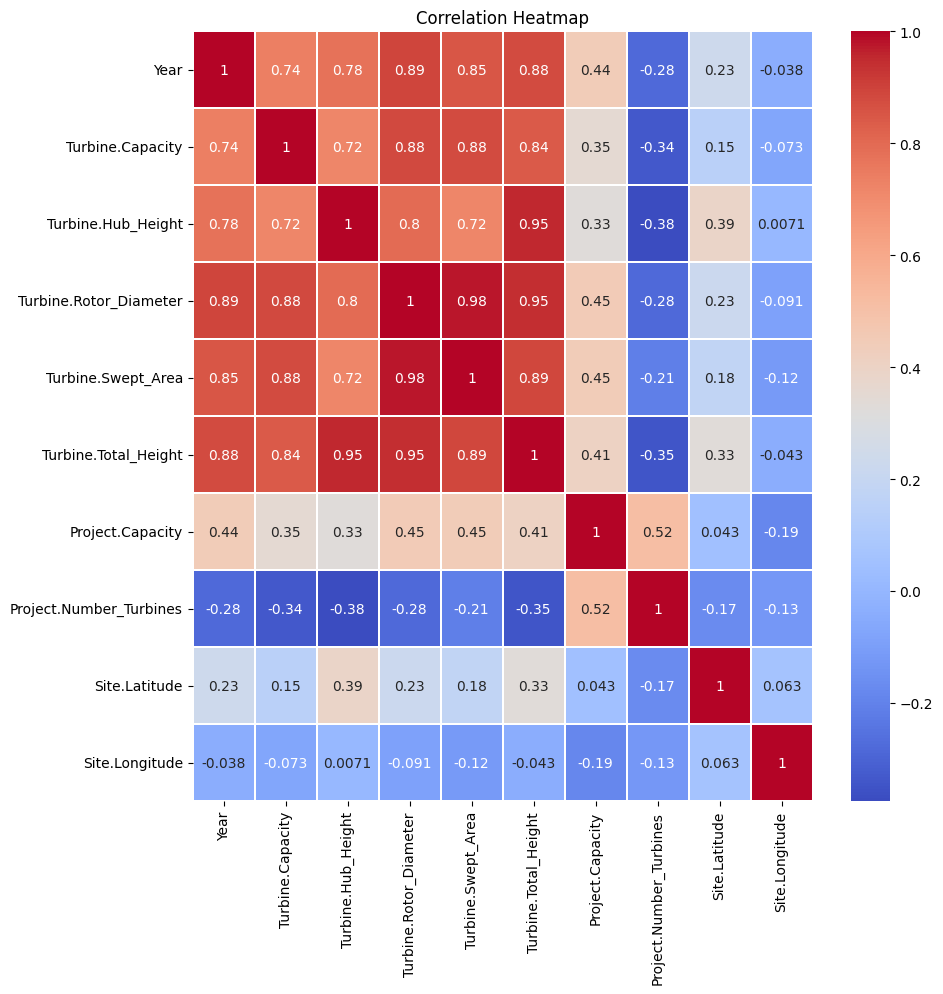

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

Информация, которая может быть извлечена из тепловой карты:


1.   Наибольший коэффициент корреляции наблюдается между диаметром и площадью ветроколеса. Это ожидаемо, так как две эти величины напрямую связаны между собой.
2.   Также наблюдается высокая степень корреляции между другими параметрами, связанными с габаритами ВЭУ: высотой гондолы, общей высотой ВЭУ, диаметром ротора.
3. Широта установки ветропарка коррелирует с высотой ВЭУ.
4. Долгота коррелирует с генерируемой мощностью.
5. Наибольшая отрицательная корреляция наблюдается между высотой ВЭУ и кол-вом трубин в ветропарке. Это может быть связано с дороговизной сверхкрупных турбин, а также тем, что для достижения требуемой мощности требуется меньше таких турбин в сравнении со средними или малыми.
6. Наименьший диаметр ротора составляет 14 м, наибольший -- 155 м.

Наибольший интерес представляет зависимость между мощностью ВЭУ и габаритами установки, а также ее географическим расположением.



In [ ]:
df.columns

Index(['Site.State', 'Site.County', 'Year', 'Turbine.Capacity',
       'Turbine.Hub_Height', 'Turbine.Rotor_Diameter', 'Turbine.Swept_Area',
       'Turbine.Total_Height', 'Project.Capacity', 'Project.Number_Turbines',
       'Site.Latitude', 'Site.Longitude'],
      dtype='object')

<Axes: xlabel='Site.Longitude', ylabel='Density'>

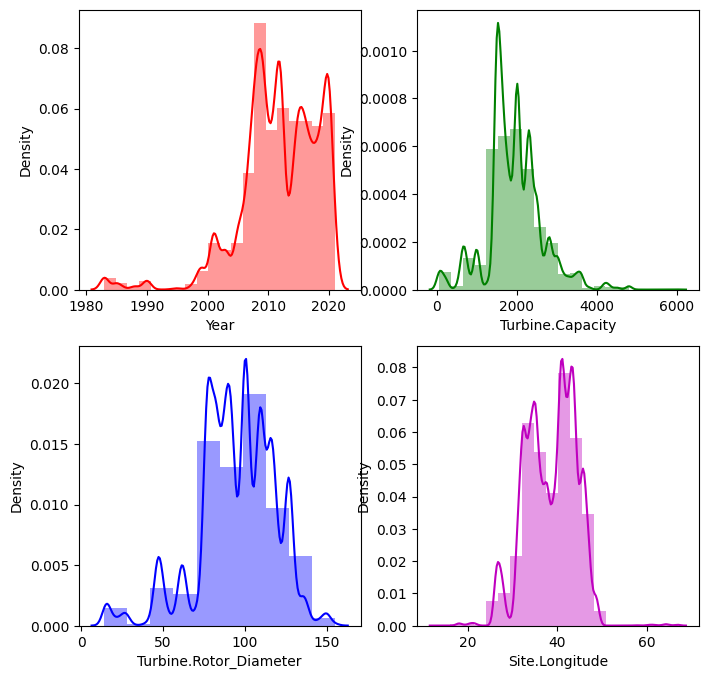

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.distplot(df['Year'], bins=20, color='r', ax=axes[0, 0])
sns.distplot(df['Turbine.Capacity'], bins=20, color='g', ax=axes[0, 1])
sns.distplot(df['Turbine.Rotor_Diameter'], bins=10, color='b', ax=axes[1, 0])
sns.distplot(df['Site.Longitude'].dropna(), bins=20, color='m', ax=axes[1, 1])

<Axes: xlabel='Year', ylabel='Project.Capacity'>

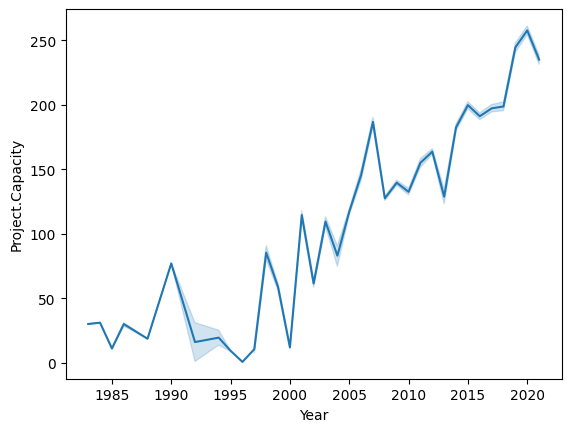

In [ ]:
sns.lineplot(data=df, x='Year', y='Project.Capacity')

<Axes: xlabel='Year', ylabel='Turbine.Rotor_Diameter'>

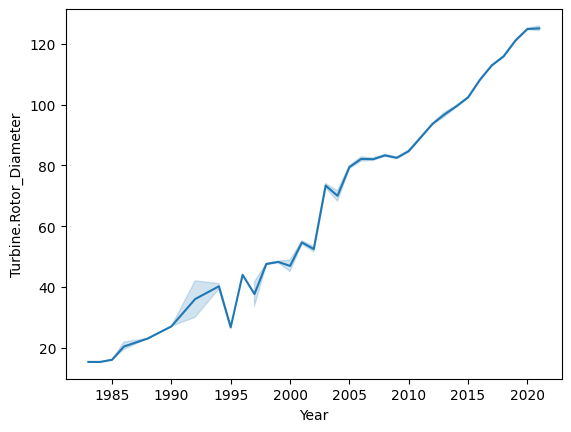

In [ ]:
sns.lineplot(data=df, x='Year', y='Turbine.Rotor_Diameter')

<Axes: xlabel='Turbine.Rotor_Diameter', ylabel='Turbine.Capacity'>

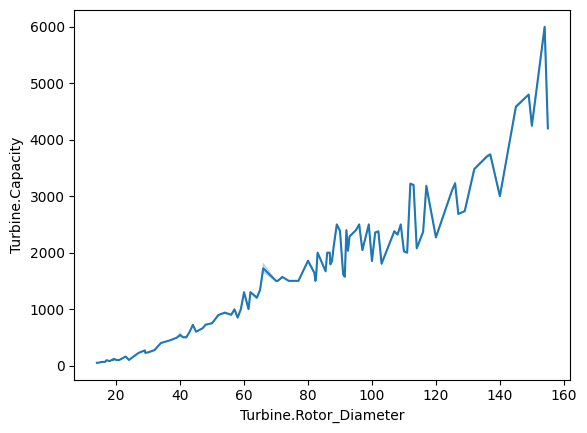

In [ ]:
sns.lineplot(data=df, x='Turbine.Rotor_Diameter', y='Turbine.Capacity')

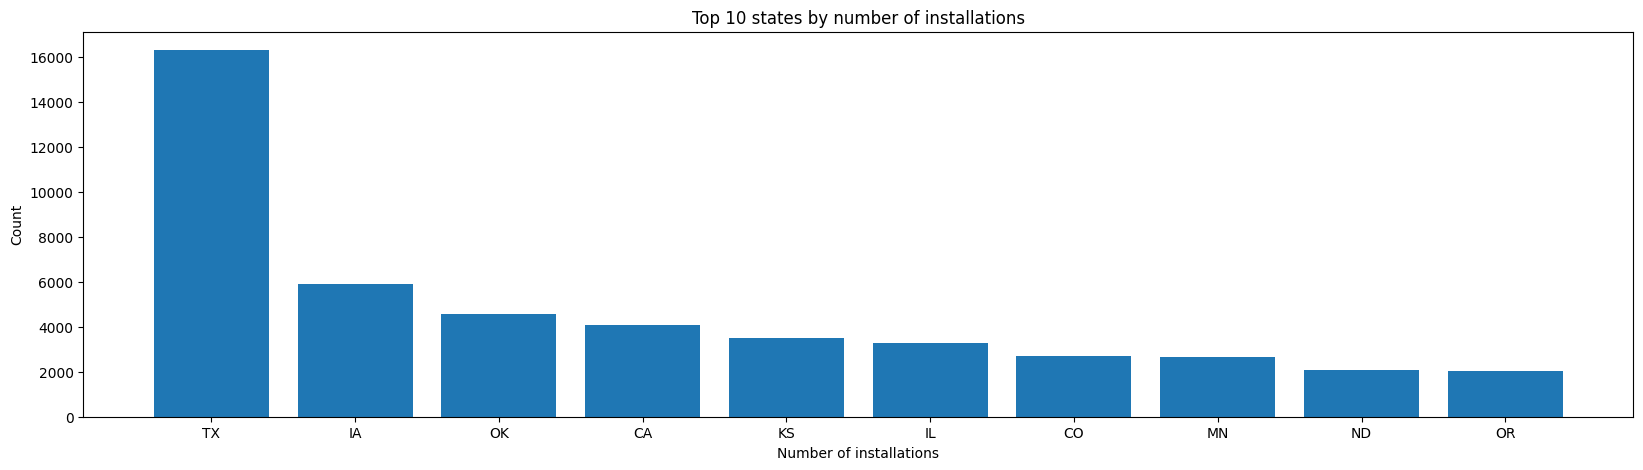

In [ ]:
states = df['Site.State'].value_counts()[:10]

plt.figure(figsize=(20, 5))
plt.bar(states.index, states)
plt.title('Top 10 states by number of installations')
plt.xlabel('Number of installations')
plt.ylabel('Count')
plt.show()

In [ ]:
y=df['Turbine.Capacity']
turbine_features=['Turbine.Hub_Height', 'Turbine.Rotor_Diameter', 'Turbine.Swept_Area',
                  'Turbine.Total_Height', 'Site.Latitude', 'Site.Longitude']

X=df[turbine_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

В первую очередь нас интересует зависимость мощности от геометрических параметров турбины и точки расположения турбины, поэтому исключим ячейки, связанные с характеристиками ветропарков и годом установки.

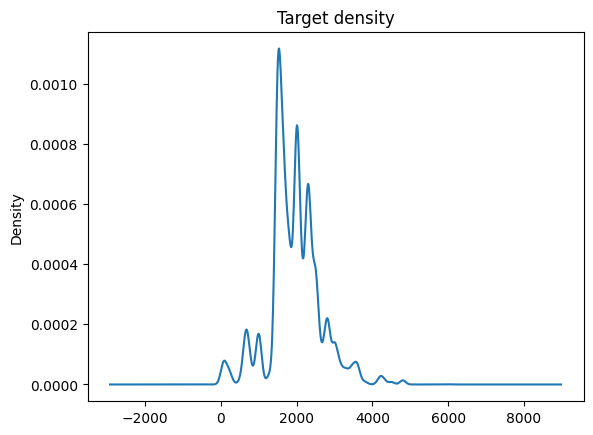

In [ ]:
y.plot(kind='kde', title='Target density');

В качестве бейзлайн-модели выберем линейную регрессию.

Основные причины:


1.   Подразумевает линейную зависимость между величинами
2.   Проста для интерпретации
3.   Хорошо работает с числовыми данными
4.   Высокое быстродействие

Критерий оценки -- RMSE

Причины выбора:


1.   Удобны для оценки точности моделей на основе линейной регрессии
2.   Просты для интерпретации
3.   Высокое быстродействие![main-qimg-cd7780dbd14e3005de89264595daeab1-lq.jpg](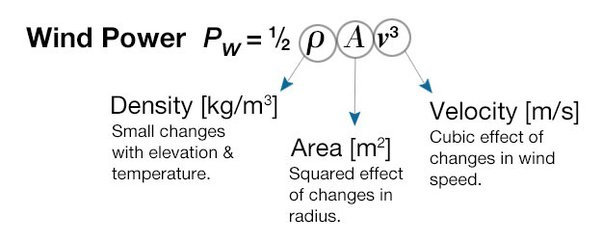![main-qimg-cd7780dbd14e3005de89264595daeab1-lq.jpg](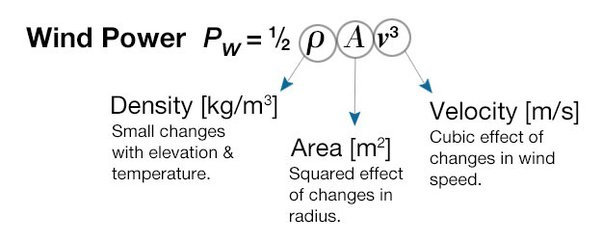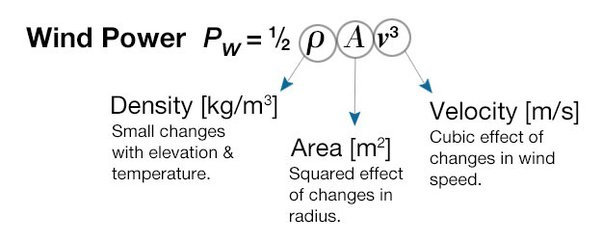))



In [ ]:
lr = LinearRegression()
lr.fit(train_X, train_y)
y_preds_lr = lr.predict(val_X)

print(f'MSE for Linear regression: {mean_squared_error(val_y, y_preds_lr)}')
print(f'RMSE for Linear regression: {mean_squared_error(val_y, y_preds_lr, squared=False)}')
print(f'MAE for Linear regression: {mean_absolute_error(val_y, y_preds_lr)}')

MSE for Linear regression: 97314.3098730954
RMSE for Linear regression: 311.9524160398432
MAE for Linear regression: 226.74471046575573


In [ ]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

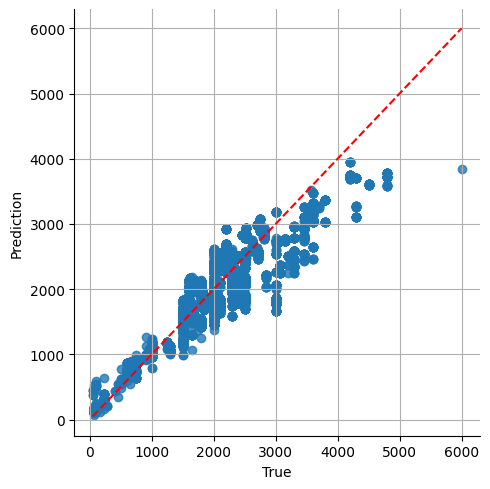

In [ ]:
plot_model_results(val_y, y_preds_lr, title='Linear Regression')

В качестве более сложной модели рассмотрим Decision Tree Regressor

In [ ]:
dtr=DecisionTreeRegressor(random_state=1)

dtr.fit(train_X, train_y)
y_preds_dtr = dtr.predict(val_X)

In [ ]:
print(f'MSE for Decision Tree regression: {mean_squared_error(val_y, y_preds_dtr)}')
print(f'RMSE for Decision Tree regression: {mean_squared_error(val_y, y_preds_dtr, squared=False)}')
print(f'MAE for Decision Tree regression: {mean_absolute_error(val_y, y_preds_dtr)}')

MSE for Decision Tree regression: 813.981176912013
RMSE for Decision Tree regression: 28.530355359020906
MAE for Decision Tree regression: 1.9554124194859608


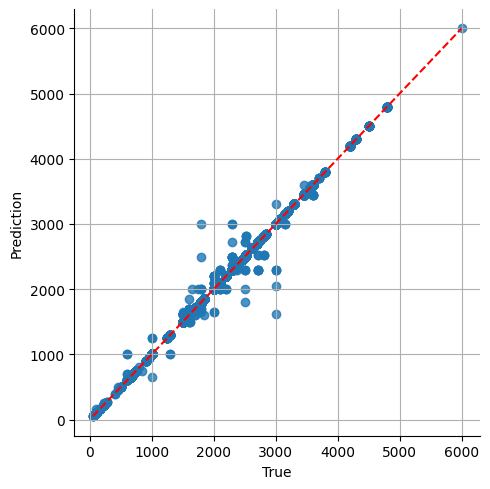

In [ ]:
plot_model_results(val_y, y_preds_dtr, title='Decision Tree Regression')

Попробуем улучшить качество предсказания, используя ансамбль -- Random Forest Regressor

In [ ]:
rf_wt = RandomForestRegressor(random_state=1)
rf_wt.fit(train_X, train_y)

y_preds_forest = rf_wt.predict(val_X)

In [ ]:
print(f'MSE for Random Forest: {mean_squared_error(val_y, y_preds_forest)}')
print(f'RMSE for Random Forest: {mean_squared_error(val_y, y_preds_forest, squared=False)}')
print(f'MAE for Random Forest: {mean_absolute_error(val_y, y_preds_forest)}')

MSE for Random Forest: 557.6285593896566
RMSE for Random Forest: 23.6141601457612
MAE for Random Forest: 2.40366456131574


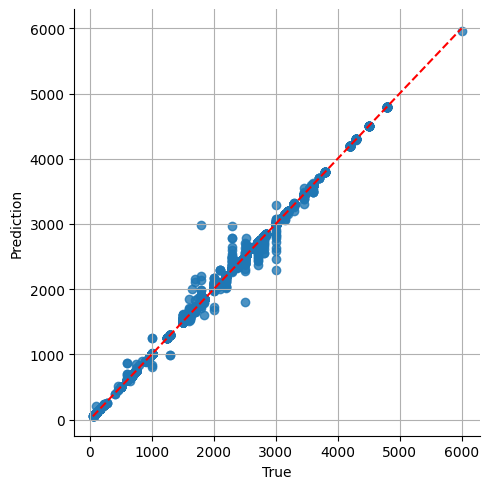

In [ ]:
plot_model_results(val_y, y_preds_forest, title='Decision Tree Regression')

Интерпретация полученной модели

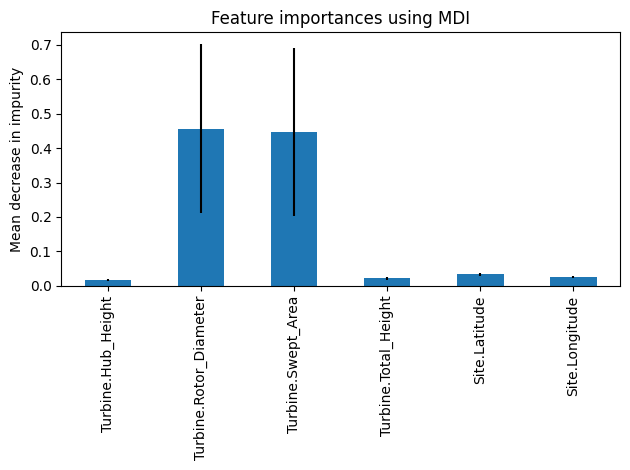

In [ ]:
forest_importances = pd.Series(rf_wt.feature_importances_, index=train_X.columns)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in rf_wt.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity", )
fig.tight_layout()

Анализ показывает, что основные параметры, влияющие на величину генерации -- это диаметр и площадь ротора. При этом величины зависимы друг от друга, т.к. площадь ротора определяется диаметром ротора.

Величина генерации, согласно уравнению, зависит от скорости ветра, площади ротора, плотности воздуха, а также коэффициента использования энергии ветра (КИЭВ).

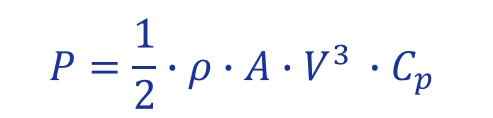

Поскольку в ходе работы исследуется в первую очередь зависимость от геометрических параметров ВЭУ, результаты интерпретации показывают полное соответствие разработанной модели и теории, что позволяет говорить об адекватности принятых решений.